In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas
import matplotlib.patheffects as path_effects
from scipy.stats import skew, kurtosis
import svgutils.compose as sc

In [2]:
'''
20230119 - How long does it take for the price to leave a given range?

Figure 1: Diagram + 10%
Figure 2: Rolling measure for 10, 20, 330bps 
Figure 3: Comparison with volatility, etc

'''
loadData=False

In [3]:
if loadData:
    # Load data from ETH-USDC-5bps pool
    ETHUSDC5=pandas.read_gbq("SELECT DISTINCT * FROM `arcane-world-371019.First_sync.1` WHERE address='0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640' ORDER BY block_number, transaction_index  ", "arcane-world-371019")
    ETHUSDC5.to_pickle('ETH-USDC-5bps.pkl')
    loadData = False
else:
    ETHUSDC5 = pandas.read_pickle("./ETH-USDC-5bps.pkl")
    

In [4]:
ticks5 = []
block5 = []
timestamp5 = []
unixtime5 = []
for index, row in ETHUSDC5.iterrows():
    ticks5.append(row['tick'])
    block5.append(row['block_number'])
    timestamp5.append((row['block_timestamp']))
    unixtime5.append(row['block_timestamp'].timestamp())
ticks5 = np.array(ticks5)
block5 = np.array(block5)
unixtime5 = np.array(unixtime5)

In [5]:
def getDelay(tickArray, timestamp, block, width, start=0, n=-1):
    timeDelay = []
    for i, t in enumerate(tickArray[start:]):
        maxT = t + width
        minT = t - width
        stop=False
        j = i+start
        while stop==False:

            j += 1
            if (j==len(tickArray)):
                stop=True
            elif ((tickArray[j] >= maxT) or (tickArray[j] <= minT)) and (block[j] != block[i+start]):
                timeDelay.append((timestamp[j] - timestamp[i+start]).total_seconds())
                stop=True
        if (n != -1) and (len(timeDelay) >= n):
            return np.array(timeDelay), j
    return np.array(timeDelay)

In [6]:
(unixtime5>(1672549200-5*3600)).nonzero()[0][0]

3840252

In [7]:
plt.style.use('../../stylesheet/panoptic-dark-16:9.mplstyle')
# start time is Jan 1st 2022
startTime = 1093837
#plt.plot(((unixtime5[startTime:(startTime+50000)]-unixtime5[startTime])/3600/24), ticks5[startTime:(startTime+50000)]-ticks5[startTime])
timeArray = ((unixtime5[startTime:(startTime+50000)]-unixtime5[startTime])/3600/24)
tickArray = ticks5[startTime:(startTime+50000)]-ticks5[startTime]
jold = 0
#plt.plot([0, 6], [0, 0], lw=0.25, color='#ffffff')
cc = ['#6c74f5', '#7ceac5', '#f305f9', '#ffac6e', '#f8d120','#efefef']

plt.plot(timeArray[0:], tickArray[0:], lw=1, color=cc[-1]) 

for i, w in enumerate([np.log(1.02)/np.log(1.0001), np.log(1.03)/np.log(1.0001), np.log(1.05)/np.log(1.0001), np.log(1.1)/np.log(1.0001)]):
    (t, j) = getDelay(ticks5, timestamp5, block5, w, startTime, 1)
    plt.plot(timeArray[jold:(j-startTime)], tickArray[jold:(j-startTime)], lw=0.375, color=cc[i])

    jold = j-startTime
    #plt.fill_between([0, t[0]/3600/24], [w, w], [-w, -w], alpha=0.5)
    plt.plot([t[0]/3600/24, t[0]/3600/24], [w, -w], color=cc[i], lw=0.25) 
    plt.plot([0, t[0]/3600/24], [w, w], color=cc[i], lw=0.25) 
    plt.plot([0, t[0]/3600/24], [-w, -w], color=cc[i],lw=0.25) 
    if w ==  np.log(1.02)/np.log(1.0001):
        plt.text(t[0]/3600/24-0.7, w, '+'+str(int(100*1.0001**w-100))+'%', fontsize=5, color=cc[i], va='center')
        plt.text(t[0]/3600/24-0.7, -w, '-'+str(int(100*1.0001**w-100))+'%', fontsize=5,color=cc[i],  va='center')
    else:
        plt.text(t[0]/3600/24-0.7, w+25, '+'+str(int(100*1.0001**w-100))+'%', color=cc[i],fontsize=5)
        plt.text(t[0]/3600/24-0.7, -w-150, '-'+str(int(100*1.0001**w-100))+'%', color=cc[i],fontsize=5)


plt.xlim((0, 6))
plt.ylim((-1200, 1200))
plt.title('First exit - ETH-USDC-5bps')
plt.xlabel('Time (days)')
plt.ylabel('ticks', labelpad=-189)

plt.savefig('ETH-Price-1.svg')
plt.savefig('ETH-Price-1.png', dpi=750)

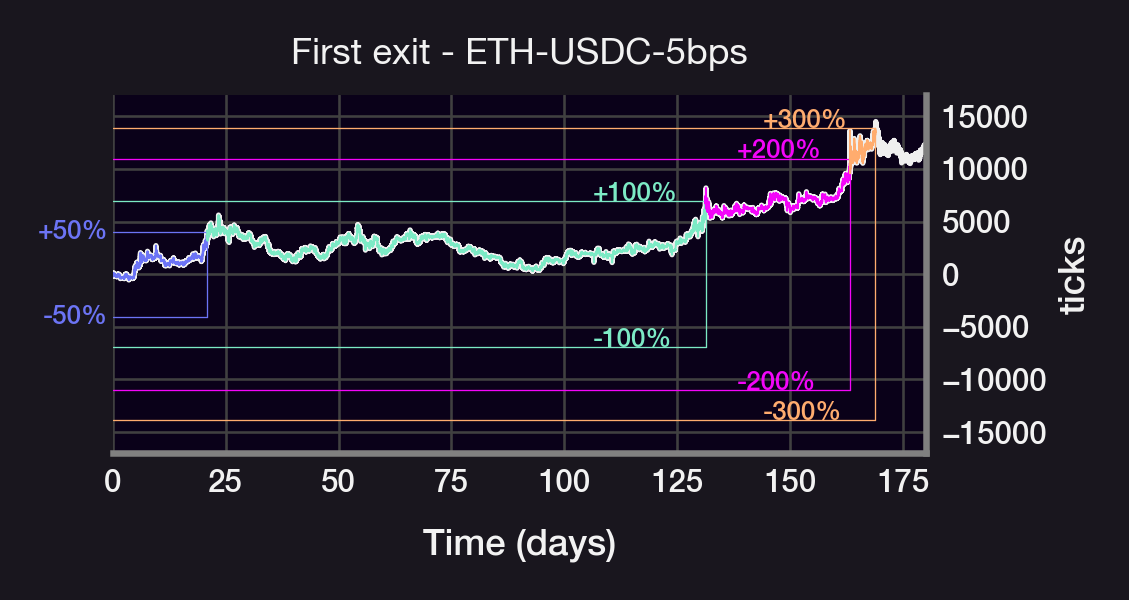

In [45]:
plt.style.use('../../stylesheet/panoptic-dark-16:9.mplstyle')
# start time is Jan 1st 2022
startTime = 1093837
# end time is Jan 1st 2023
endTime = 3840252
#plt.plot(((unixtime5[startTime:(startTime+50000)]-unixtime5[startTime])/3600/24), ticks5[startTime:(startTime+50000)]-ticks5[startTime])
timeArray = ((unixtime5[startTime:(startTime+endTime)]-unixtime5[startTime])/3600/24)
tickArray = ticks5[startTime:(startTime+endTime)]-ticks5[startTime]
jold = 0
#plt.plot([0, 6], [0, 0], lw=0.25, color='#ffffff')
cc = ['#6c74f5', '#7ceac5', '#f305f9', '#ffac6e', '#f8d120','#efefef']

plt.plot(timeArray[0:], tickArray[0:], lw=1, color=cc[-1]) 

for i, w in enumerate([np.log(1.5)/np.log(1.0001), np.log(2)/np.log(1.0001), np.log(3)/np.log(1.0001), np.log(4)/np.log(1.0001)]):
    (t, j) = getDelay(ticks5, timestamp5, block5, w, startTime, 1)
    plt.plot(timeArray[jold:(j-startTime)], tickArray[jold:(j-startTime)], lw=0.375, color=cc[i])

    jold = j-startTime
    #plt.fill_between([0, t[0]/3600/24], [w, w], [-w, -w], alpha=0.5)
    plt.plot([t[0]/3600/24, t[0]/3600/24], [w, -w], color=cc[i], lw=0.25) 
    plt.plot([0, t[0]/3600/24], [w, w], color=cc[i], lw=0.25) 
    plt.plot([0, t[0]/3600/24], [-w, -w], color=cc[i],lw=0.25) 
    if w ==  np.log(1.5)/np.log(1.0001):
        plt.text(-1, w, '+'+str(int(100*1.0001**w-100))+'%', fontsize=5, color=cc[i], va='center', ha='right')
        plt.text(-1, -w, '-'+str(int(100*1.0001**w-100))+'%', fontsize=5,color=cc[i],  va='center', ha='right')
    else:
        plt.text(t[0]/3600/24-25, w+25, '+'+str(int(100*1.0001**w-100))+'%', color=cc[i],fontsize=5)
        plt.text(t[0]/3600/24-25, -w+25, '-'+str(int(100*1.0001**w-100))+'%', color=cc[i],fontsize=5)


plt.xlim((0, 180))
plt.ylim((-17000, 17000))
plt.yticks([-15000, -10000, -5000, 0, 5000, 10000, 15000])
plt.title('First exit - ETH-USDC-5bps')
plt.xlabel('Time (days)')
plt.ylabel('ticks', labelpad=-188)

plt.savefig('ETH-Price-2.svg')
plt.savefig('ETH-Price-2.png', dpi=750)

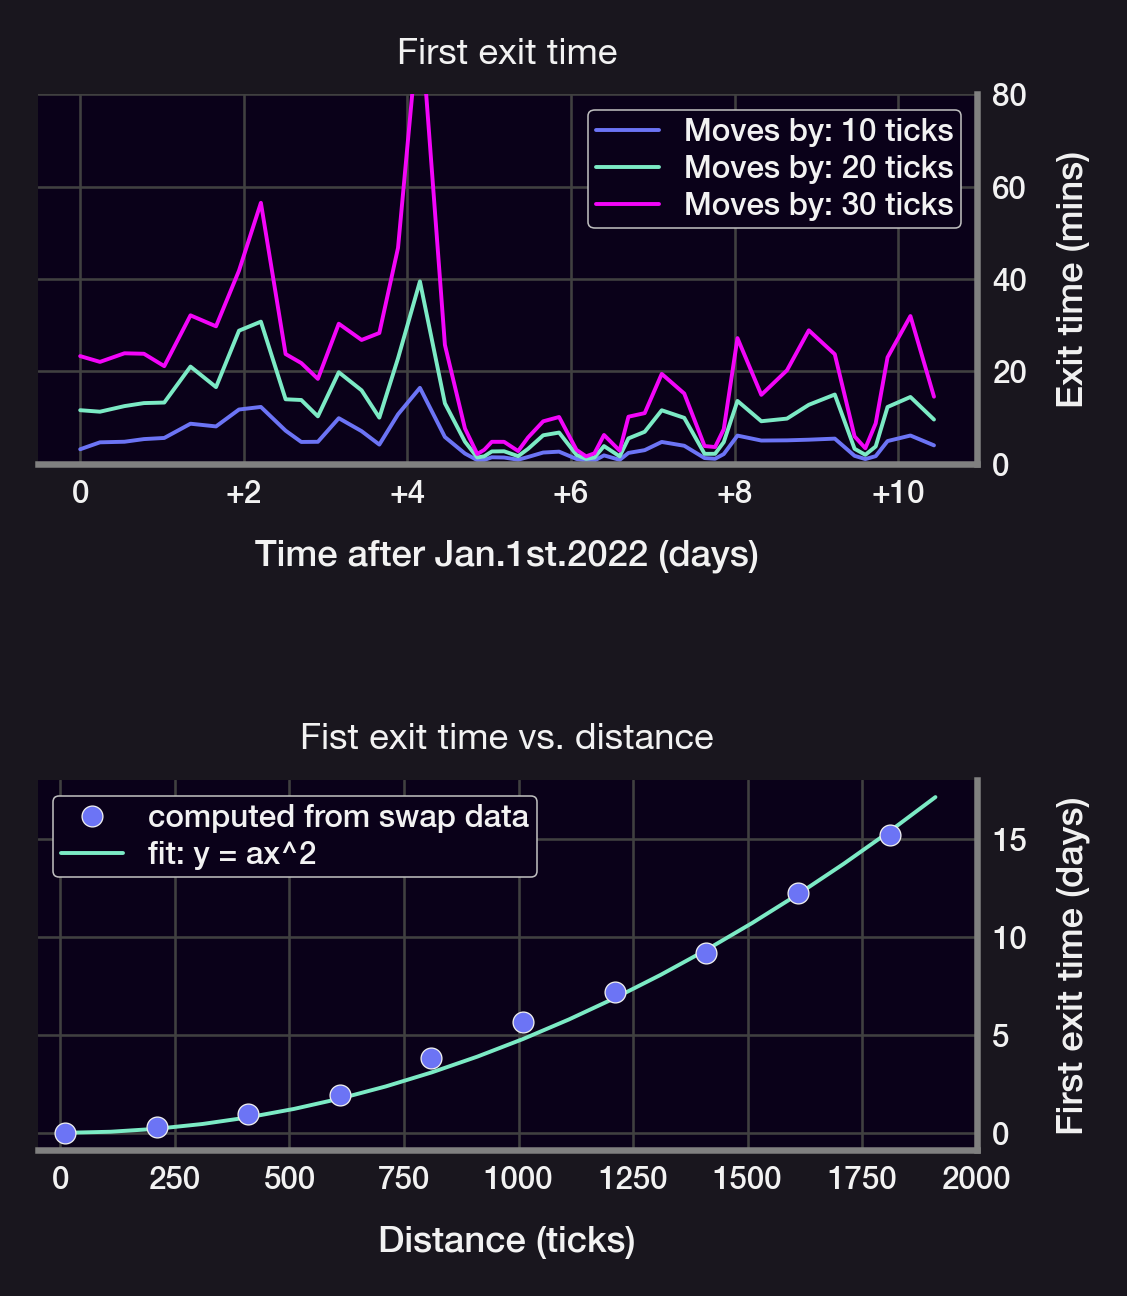

In [46]:
plt.style.use('../../stylesheet/panoptic-dark-7:8.mplstyle')

# start time is Jan 1st 2022
startTime = 1093837
# end time is Jan 1st 2023
endTime = 3840252


plt.subplot(2,1,1)
D10 = []
D20 = []
D30 = []
D100 = []

for i in range(startTime, startTime+50000, 1000):
    D10.append(np.mean(getDelay(ticks5, timestamp5, block5, 10, i, 1000)[0]))
    D20.append(np.mean(getDelay(ticks5, timestamp5, block5, 20, i, 1000)[0]))   
    D30.append(np.mean(getDelay(ticks5, timestamp5, block5, 30, i, 1000)[0]))
    #D100.append(getDelay(ticks5, timestamp5, block5, 100, i, 1)[0][0])

    
#plt.plot(np.array(D360[:2700]).reshape(-1, 1).mean(1)/3600/24)
plt.plot(((unixtime5[startTime:(startTime+50000)]-unixtime5[startTime])/3600/24).reshape(-1, 1000).min(1), np.array(D10[:2700]).reshape(-1, 1).mean(1)/60, label='Moves by: 10 ticks')
plt.plot(((unixtime5[startTime:(startTime+50000)]-unixtime5[startTime])/3600/24).reshape(-1, 1000).min(1), np.array(D20[:2700]).reshape(-1, 1).mean(1)/60, label='Moves by: 20 ticks')
plt.plot(((unixtime5[startTime:(startTime+50000)]-unixtime5[startTime])/3600/24).reshape(-1, 1000).min(1), np.array(D30[:2700]).reshape(-1, 1).mean(1)/60, label='Moves by: 30 ticks')

plt.title('First exit time')
plt.xlabel('Time after Jan.1st.2022 (days)')
plt.xticks([0, 2, 4, 6, 8, 10], ['0', '+2', '+4', '+6', '+8', '+10'])
plt.ylabel('Exit time (mins)', labelpad=-202)
plt.ylim((0, 80))
plt.legend()




plt.subplot(2,1,2)
startTime = 0

for width in range(10, 2010, 200):
    D = []
    for i in range(0, 2000000, 10000): 
        D.append(getDelay(ticks5, timestamp5, block5, width, startTime+i, 1)[0][0])
    plt.plot(width, np.mean(D)/3600/24,'o', mew=0.25, mec='#efefef', ms=4, mfc='#6c74f5', zorder=10)
    
plt.plot(width+500, np.mean(D)/3600/24, 'o', mew=0.25, mec='#efefef', ms=4, mfc='#6c74f5',label='computed from swap data', zorder=10)
plt.xlim((-50, 2000))
plt.title('Fist exit time vs. distance')    
plt.xlabel('Distance (ticks)')
plt.ylabel('First exit time (days)', labelpad=-202)
plt.plot(np.arange(10, 2010, 100), 18.8*(np.arange(10, 2010, 100)/2000)**2, color='#7ceac5', label='fit: y = ax^2', zorder=8)
plt.legend()
plt.savefig('ETH-Exit-1.svg')
plt.savefig('ETH-Exit-1.png', dpi=750)

In [9]:
plt.style.use('../../stylesheet/panoptic-dark-16:9.mplstyle')

# start time is Jan 1st 2022
startTime = 1093837
# end time is Jan 1st 2023
endTime = 3840252
sD20 = []
for i in range(startTime, endTime, 1):
    sD20.append(np.mean(getDelay(ticks5, timestamp5, block5, 20, i, 1)[0][0]))


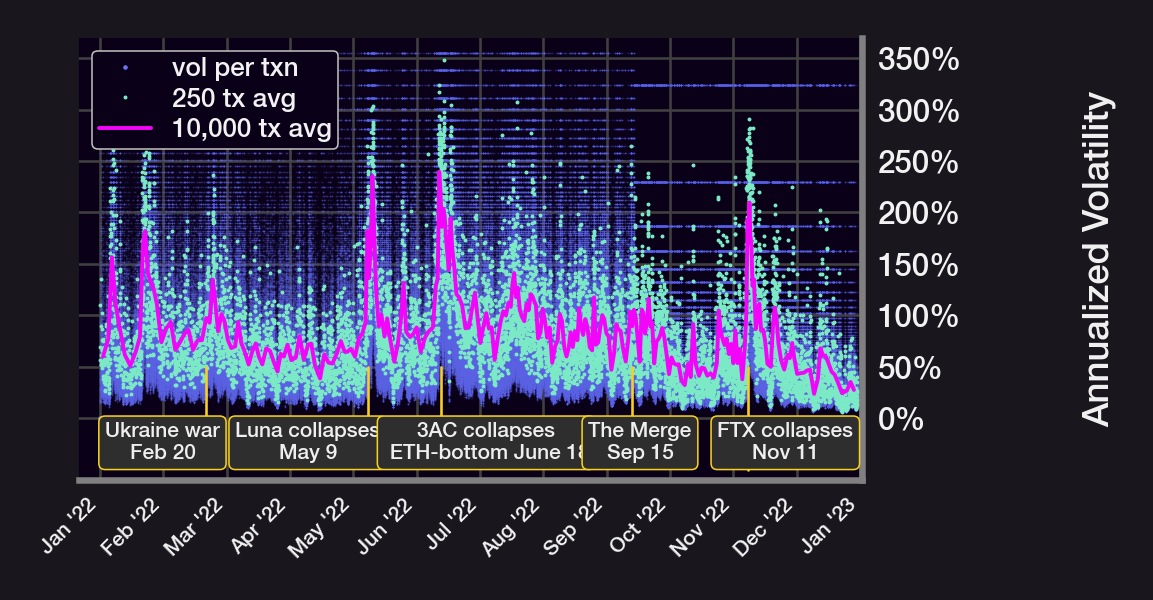

In [10]:
plt.style.use('../../stylesheet/panoptic-dark-16:9.mplstyle')
# start time is Jan 1st 2022
startTime = 1093837
# end time is Jan 1st 2023
endTime = 3840252

avgWindow = 1
plt.plot(0, 0,'.', color='#6c74f5', ms=1.25, alpha=1, label='vol per txn')
plt.plot((unixtime5[startTime:endTime][:2746000].reshape(-1, avgWindow).mean(1)-unixtime5[startTime])/3600/24, np.log(1.0001)*np.sqrt(3600*24*365)*(20/np.sqrt(np.array(sD20[:2746000]))).reshape(-1, avgWindow).mean(1),'.', ms=0.375, alpha=0.05)
avgWindow = 250
plt.plot((unixtime5[startTime:endTime][:2746000].reshape(-1, avgWindow).mean(1)-unixtime5[startTime])/3600/24, np.log(1.0001)*np.sqrt(3600*24*365)*(20/np.sqrt(np.array(sD20[:2746000]))).reshape(-1, avgWindow).mean(1),'.', color='#7ceac5',ms=1, alpha=1, label='250 tx avg')
avgWindow = 10000
plt.plot((unixtime5[startTime:endTime][:2740000].reshape(-1, avgWindow).mean(1)-unixtime5[startTime])/3600/24, np.log(1.0001)*np.sqrt(3600*24*365)*(20/np.sqrt(np.array(sD20[:2740000]))).reshape(-1, avgWindow).mean(1), color='#f305f9', label='10,000 tx avg')


plt.plot([51, 51], [-0.3, 0.5], lw=0.5, color='#f8d120')
plt.text(30, -0.4, 'Ukraine war\nFeb 20', fontsize=4, color='#efefef', ha='center', bbox=dict(boxstyle='round', fc="#2e2e2e", ec="#f8d120"))

plt.plot([129, 129], [-0.3, 0.5], lw=0.5, color='#f8d120')
plt.text(100, -0.4, 'Luna collapses\nMay 9', fontsize=4, color='#efefef', ha='center', bbox=dict(boxstyle='round', fc="#2e2e2e", ec="#f8d120"))

plt.plot([164, 164], [-0.3, 0.5], lw=0.5, color='#f8d120')
plt.text(186, -0.4, '3AC collapses\n ETH-bottom June 18', color='#efefef', fontsize=4, ha='center', bbox=dict(boxstyle='round', fc="#2e2e2e", ec="#f8d120"))

plt.plot([256, 256], [-0.3, 0.5], lw=0.5, color='#f8d120')
plt.text(260, -0.4, 'The Merge\nSep 15', fontsize=4, ha='center', color='#efefef', bbox=dict(boxstyle='round', fc="#2e2e2e", ec="#f8d120"))

plt.plot([312, 312], [-0.5, 0.5], lw=0.5, color='#f8d120')
plt.text(330, -0.4, 'FTX collapses\nNov 11', fontsize=4, color='#efefef', ha='center', bbox=dict(boxstyle='round', fc="#2e2e2e", ec="#f8d120"))



plt.legend(loc=2)
plt.ylabel('Annualized Volatility', labelpad=-199)
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5], ['0%','50%','100%','150%','200%', '250%', '300%', '350%'])
plt.xticks(np.arange(0, 375, 30.5), ["Jan '22", "Feb '22", "Mar '22", "Apr '22", "May '22", "Jun '22", "Jul '22", "Aug '22", "Sep '22", "Oct '22", "Nov '22", "Dec '22", "Jan '23"], rotation=45, fontsize=4, ha='right')
plt.ylim((-0.6, 3.7))
plt.xlim((-10, 367))

plt.tight_layout()
#plt.savefig('ETH-Vol-1.svg')
plt.savefig('ETH-Vol-1.png', dpi=750)

[]

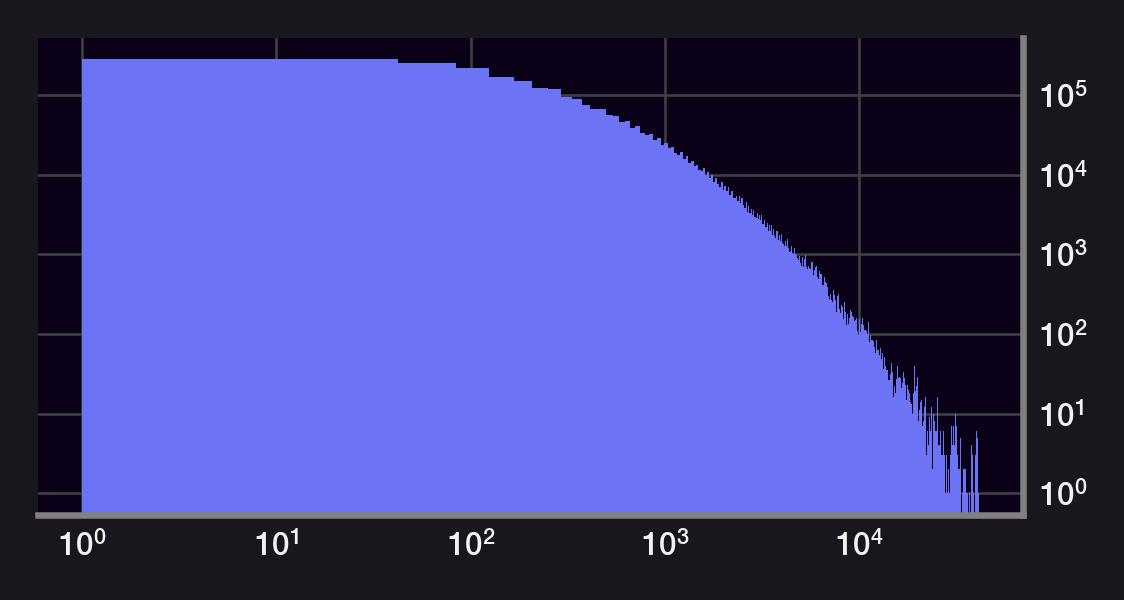

In [13]:
plt.hist(sD20, 1000)
plt.loglog()

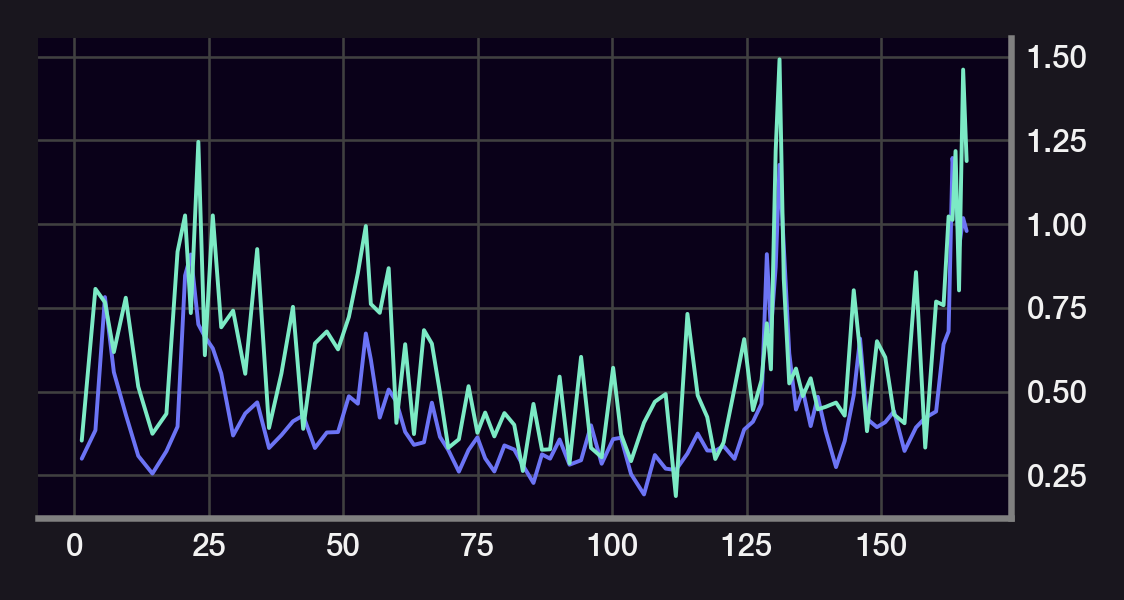

In [681]:
avgWindow = 10000
plt.plot((unixtime5[startTime:endTime][:1000000].reshape(-1, avgWindow).mean(1)-unixtime5[startTime])/3600/24, np.log(1.0001)*np.sqrt(3600*24*365)*(10/np.sqrt(np.array(D20[:1000000]))).reshape(-1, avgWindow).mean(1), label='5000txn avg')

plt.plot((unixtime5[startTime:endTime][:1000000].reshape(-1, avgWindow).mean(1)-unixtime5[startTime])/3600/24, np.log(1.0001)*(np.sqrt(3600*24*365)*np.array(RV)[:1000000]).reshape(-1, avgWindow).mean(1)/2/np.sqrt(5000), label='5000txn avg')


In [689]:
(unixtime5[(i+5000)]-unixtime5[i])/3600/24/365

0.0016011542364282093

In [722]:
np.diff(ticks5[i:(i+5000)].reshape(-1, 2).mean(0)),np.diff(unixtime5[i:(i+5000)].reshape(-1, 2).mean(0))

(array([-0.0532]), array([9.67560005]))

In [803]:
i=100000
np.sqrt(np.log(1.0001)*np.var(np.diff(ticks5[i:(i+5000)].reshape(-1, 100).mean(1))/np.diff(unixtime5[i:(i+5000)].reshape(-1, 100).mean(1)))*3600*24*365)

1.7500127733432091

In [892]:
np.arange(0, 375, 30.5)

array([  0. ,  30.5,  61. ,  91.5, 122. , 152.5, 183. , 213.5, 244. ,
       274.5, 305. , 335.5, 366. ])

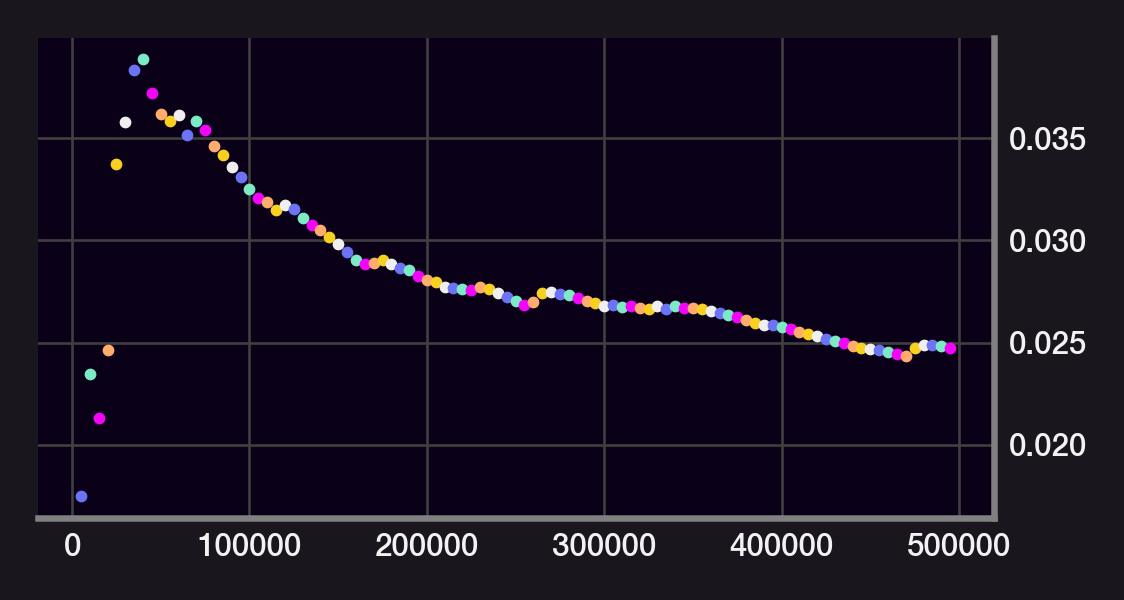

In [845]:
for j in range(5000, 500000, 5000):
    plt.plot(j, np.sqrt(3600*24*365)*np.std((np.log(1.0001)*np.diff(ticks5[i:(i+j)].reshape(-1, 100).mean(1))/np.diff(unixtime5[i:(i+j)].reshape(-1, 100).mean(1)))),'o')

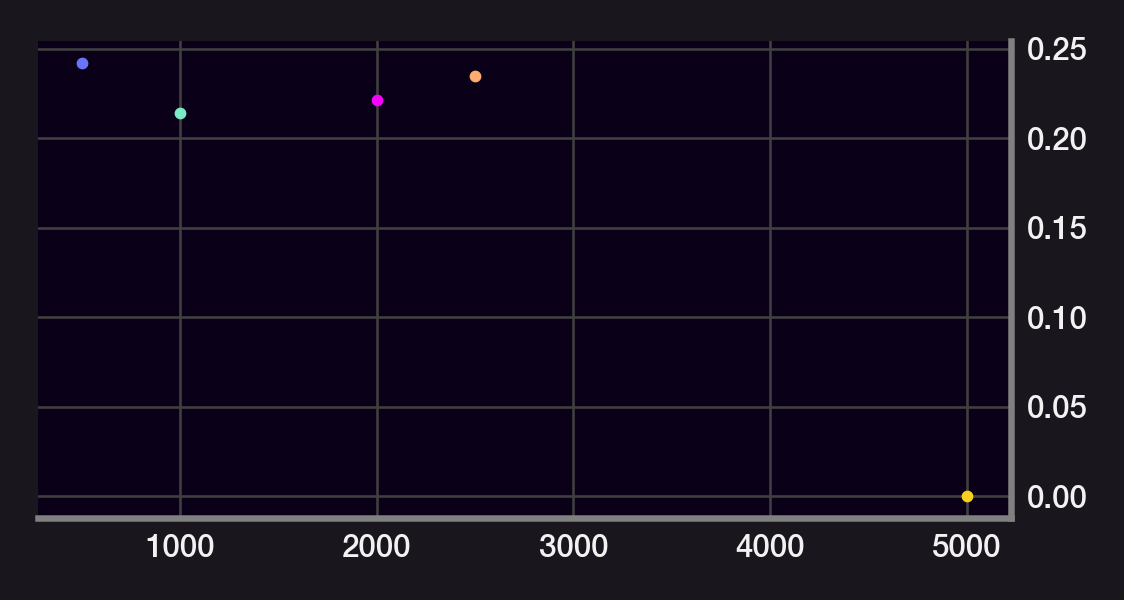

In [857]:
for j in range(500, 50000, 100):
    try:
        plt.plot(j, np.sqrt(j*3600*24*365)*np.std((np.log(1.0001)*np.diff(ticks5[i:(i+10000)].reshape(-1, j).mean(1))/np.diff(unixtime5[i:(i+10000)].reshape(-1, j).mean(1)))),'o')
    except:
        pass